# Importation du dataset

In [5]:
import pandas as pd

path = "./Datasets/"
general_data = pd.read_csv(path +"general_data.csv")

general_data.head()

,Attrition,BusinessTravel,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,AttendanceScore
0,0.0,1.0,1.0,1,0,0,3.0,4.0,442.419037
1,1.0,2.0,6.0,5,1,4,3.0,2.0,463.138136
2,0.0,2.0,5.0,5,0,3,2.0,2.0,420.794421
3,0.0,0.0,13.0,8,7,5,4.0,4.0,431.620709
4,0.0,1.0,9.0,6,0,4,4.0,1.0,480.370476


# Régression logistique

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#modele de regression logistique
model = LogisticRegression()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(general_data.drop("Attrition", axis=1), general_data.Attrition, test_size=0.3, random_state=42)

# Create pca 
pca = PCA()

# Create the scaler
scaler = StandardScaler()

# Create the pipeline
pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('logistic_regression', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

accuracy: 0.8586545729402872


Le graphe que vous avez partagé semble être le résultat d'une Analyse en Composantes Principales (PCA) avec une superposition de points représentant deux classes d'attrition : -1 pour non et 1 pour oui, si nous interprétons les légendes littéralement. L'analyse PCA est souvent utilisée pour réduire la dimensionnalité des données tout en préservant autant de variabilité que possible.

Voici quelques points d'analyse pour le graphe :

Distribution des données : Les points sont répartis principalement le long du Principal Component 1 (PC1), ce qui suggère que PC1 capture une grande partie de la variance des données. Le Principal Component 2 (PC2) apporte également une certaine quantité d'informations, comme le montre la distribution des points le long de cet axe.

Séparation des classes : La séparation entre les classes -1 et 1 n'est pas très distincte, indiquant que les deux composantes principales ne parviennent pas à séparer complètement les données d'attrition en groupes clairement distincts.

Performance du modèle : Vous avez mentionné une précision (accuracy) de 0.84. Cela signifie que le modèle de classification qui utilise ces deux composantes principales peut correctement prédire l'attrition 84% du temps. C'est une performance assez bonne, surtout si l'on considère que l'ensemble de données peut être assez complexe et que la PCA est un outil de réduction de dimensionnalité plutôt qu'un classificateur.

Considérations supplémentaires : Bien que la précision soit un indicateur utile de la performance du modèle, elle ne donne pas toute l'image, surtout dans les cas où les classes sont déséquilibrées (c'est-à-dire que l'une des classes est beaucoup plus fréquente que l'autre). Il est donc important d'examiner également d'autres métriques telles que la précision, le rappel, le score F1, et la courbe ROC-AUC pour une évaluation complète.

Interprétation des composantes principales : Les axes de la PCA ne sont pas aussi interprétables que les variables originales, car chaque composant est une combinaison linéaire de toutes les variables. Une inspection plus détaillée des vecteurs propres pourrait donner des indications sur les variables les plus influentes pour chaque composant principal.

En conclusion, le PCA a réussi à projeter les données sur deux dimensions avec une séparation raisonnable entre les classes d'attrition, et le modèle a une bonne précision de classification. Pour améliorer la compréhension du modèle, il serait bénéfique de consulter la matrice de confusion, les scores de classification par classe et d'examiner si d'autres méthodes ou un nombre différent de composants principaux pourraient fournir une meilleure séparation des classes.

# Matrice de confusion

In [7]:
#matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1102,   13],
       [ 174,   34]], dtype=int64)

# Hyperparamètres

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Supposons que X_train, X_test, y_train, y_test soient déjà définis

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'échantillons requis à chaque feuille
    'bootstrap': [True, False]        # Méthode d'échantillonnage des ensembles de données
}

# Création du modèle de base à tuner
rf = RandomForestClassifier(random_state=42)

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustement du modèle GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage de la meilleure combinaison d'hyperparamètres
print(f'Meilleurs hyperparamètres: {grid_search.best_params_}')

# Entraînement du modèle avec la meilleure combinaison d'hyperparamètres
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matrice de confusion:')
print(cm)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs hyperparamètres: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.98
Matrice de confusion:
[[1106    9]
 [  18  190]]


# Courbe ROC

Precision: 0.95
Recall: 0.91
F1-score: 0.93


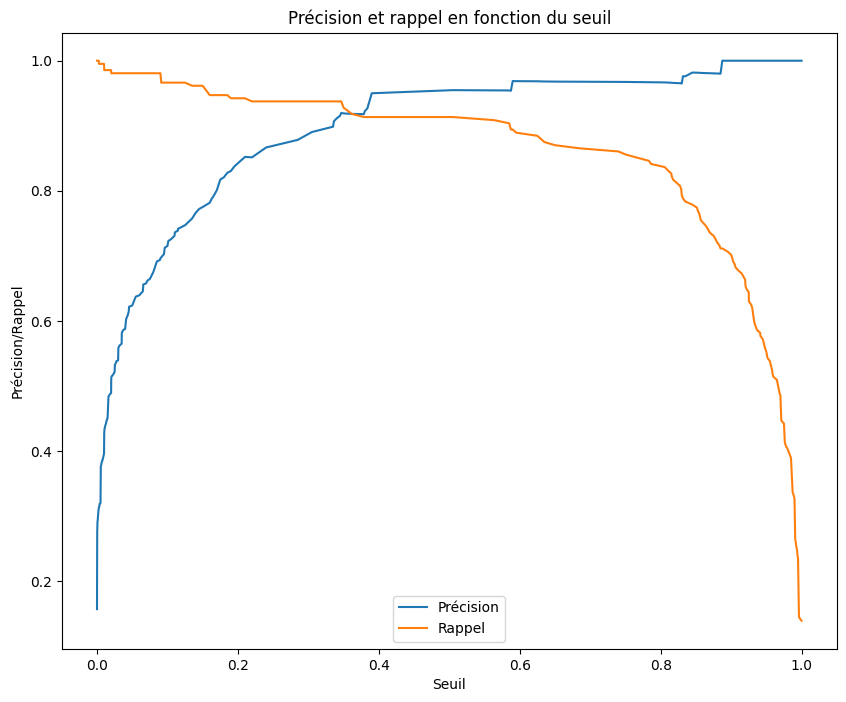

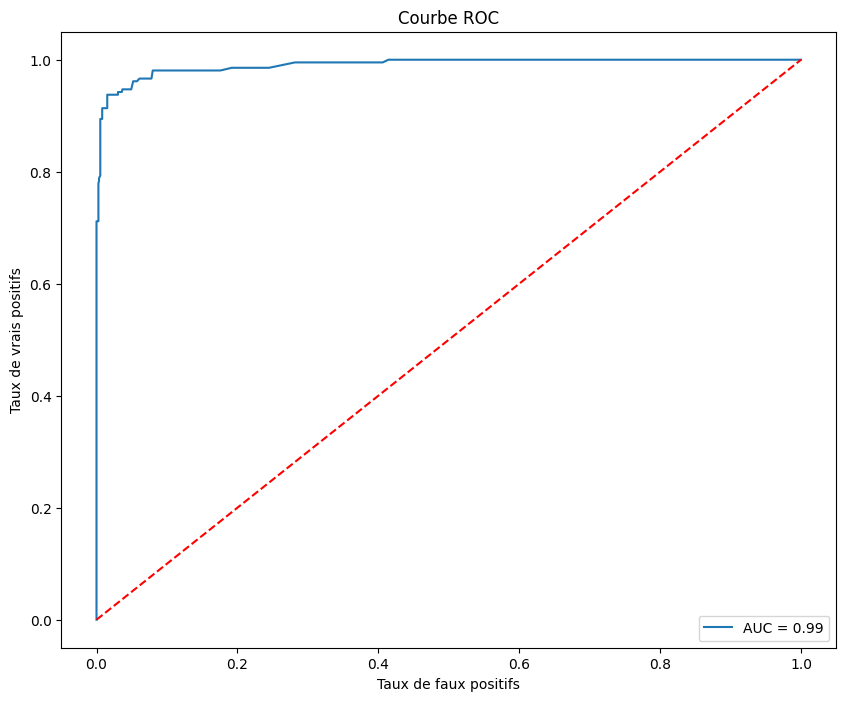

In [9]:
#precision du modèle 
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# rappel du modèle
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1-score du modèle
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

#treshold
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calcul des probabilités prédites
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Calcul de la précision et du rappel pour différents seuils
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Affichage de la courbe de précision et du rappel en fonction du seuil
plt.figure(figsize=(10, 8))
plt.plot(thresholds, precision[:-1], label='Précision')
plt.plot(thresholds, recall[:-1], label='Rappel')
plt.xlabel('Seuil')
plt.ylabel('Précision/Rappel')
plt.title('Précision et rappel en fonction du seuil')
plt.legend()
plt.show()

# Courbe ROC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcul des probabilités prédites
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcul de l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Affichage de la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Threshold

In [10]:
# application du threshold dans le modèle 

# Sélection du seuil
threshold = 0.355

# Prédiction des probabilités
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Prédiction des classes
y_pred = (y_pred_proba >= threshold).astype(int)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print('Matrice de confusion:')
print(cm)

# Calcul de la précision
precision = precision_score(y_test, y_pred)
print(f'Précision: {precision:.2f}')

# Calcul du rappel
recall = recall_score(y_test, y_pred)
print(f'Rappel: {recall:.2f}')

# Calcul du F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Calcul de l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {roc_auc:.2f}')

Matrice de confusion:
[[1098   17]
 [  17  191]]
Précision: 0.92
Rappel: 0.92
F1-score: 0.92
AUC: 0.99
